<center><h2>ARIMA Model</h2></center>

<h3>Importing libraries</h3>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Reading the dataset</h3>

In [32]:
data = pd.read_csv("reduced_df.csv")

<h3>Dataset Description</h3>

In [33]:
data.head()

,Unnamed: 0,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299,target
0,0,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,0.965623,1.230508,0.114809,...,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566,-0.300875
1,1,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,1.428127,1.134144,0.114809,...,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624,-0.231040
2,2,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,0.979656,-1.125681,0.114809,...,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608,0.568807
3,3,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,0.778096,0.298990,0.114809,...,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309,-1.064780
4,4,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,-0.946789,1.230508,0.114809,...,0.912726,-0.741355,-1.220772,0.941183,-0.588445,0.104928,0.753279,1.345611,-0.737624,-0.531940


<h3>Explanatory and Target Variables</h3>

In [34]:
X = data[['f_0','f_1','f_2','f_3','f_4','f_5','f_6','f_7','f_8','f_9','f_10','f_11','f_12','f_13','f_14','f_15','f_16','f_17',
'f_18','f_19','f_20','f_21','f_22','f_23','f_24','f_25','f_26','f_27','f_28','f_29','f_30','f_31','f_32','f_33','f_34','f_35',
'f_36','f_37','f_38','f_39','f_40','f_41','f_42','f_43','f_44','f_45','f_46','f_47','f_48','f_49','f_50','f_51','f_52','f_53',
'f_54','f_55','f_56','f_57','f_58','f_59','f_60','f_61','f_62','f_63','f_64','f_65','f_66','f_67','f_68','f_69','f_70','f_71',
'f_72','f_73','f_74','f_75','f_76','f_77','f_78','f_79','f_80','f_81','f_82','f_83','f_84','f_85','f_86','f_87','f_88','f_89',
'f_90','f_91','f_92','f_93','f_94','f_95','f_96','f_97','f_98','f_99','f_100','f_101','f_102','f_103','f_104','f_105','f_106',
'f_107','f_108','f_109','f_110','f_111','f_112','f_113','f_114','f_115','f_116','f_117','f_118','f_119','f_120','f_121','f_122',
'f_123','f_124','f_125','f_126','f_127','f_128','f_129','f_130','f_131','f_132','f_133','f_134','f_135','f_136','f_137','f_138',
'f_139','f_140','f_141','f_142','f_143','f_144','f_145','f_146','f_147','f_148','f_149','f_150','f_151','f_152','f_153','f_154',
'f_155','f_156','f_157','f_158','f_159','f_160','f_161','f_162','f_163','f_164','f_165','f_166','f_167','f_168','f_169','f_170',
'f_171','f_172','f_173','f_174','f_175','f_176','f_177','f_178','f_179','f_180','f_181','f_182','f_183','f_184','f_185','f_186',
'f_187','f_188','f_189','f_190','f_191','f_192','f_193','f_194','f_195','f_196','f_197','f_198','f_199','f_200','f_201','f_202',
'f_203','f_204','f_205','f_206','f_207','f_208','f_209','f_210','f_211','f_212','f_213','f_214','f_215','f_216','f_217','f_218',
'f_219','f_220','f_221','f_222','f_223','f_224','f_225','f_226','f_227','f_228','f_229','f_230','f_231','f_232','f_233','f_234',
'f_235','f_236','f_237','f_238','f_239','f_240','f_241','f_242','f_243','f_244','f_245','f_246','f_247','f_248','f_249','f_250',
'f_251','f_252','f_253','f_254','f_255','f_256','f_257','f_258','f_259','f_260','f_261','f_262','f_263','f_264','f_265','f_266',
'f_267','f_268','f_269','f_270','f_271','f_272','f_273','f_274','f_275','f_276','f_277','f_278','f_279','f_280','f_281','f_282',
'f_283','f_284','f_285','f_286','f_287','f_288','f_289','f_290','f_291','f_292','f_293','f_294','f_295','f_296','f_297','f_298',
'f_299']]

Y = data['target']

<h3>Principal Component Analysis (PCA)</h3>

In [35]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 50)
X_new = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

In [36]:
X_new

array([[  5.93077124,   2.82408142,  -6.39142608, ...,  -0.43942511,
         -0.05630249,   0.44075842],
       [ -1.97908198,   5.20564111,   4.76911725, ...,  -0.60513217,
          1.9577861 ,   0.58343015],
       [  0.06088422,  -0.20815708,  -5.46240171, ...,   1.07045221,
          1.6289973 ,   0.59396359],
       ...,
       [-11.15120696,   5.97159741,   0.41326675, ...,   0.72703958,
          0.31122   ,   0.3540837 ],
       [-10.62579612,  -2.91714487,  -0.38627   , ...,   0.10153369,
          0.70998279,   0.18124813],
       [ -3.81431942,  -4.78487667,  -0.36581085, ...,  -0.38361158,
          0.09973517,   0.30421916]])

In [37]:
X_new_df = pd.DataFrame(X_new)

In [38]:
new_df = pd.concat([X_new_df, Y], axis=1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
0,5.930771,2.824081,-6.391426,-0.642584,0.846272,0.199082,2.039746,1.618099,-2.733864,-1.212343,...,-2.238906,1.275141,1.905519,0.791361,1.147832,-0.978198,-0.439425,-0.056302,0.440758,-0.300875
1,-1.979082,5.205641,4.769117,1.021427,-2.399518,-4.065766,-0.409904,-1.589033,-1.065362,-0.094071,...,-1.131964,2.145631,0.827454,-1.347425,1.806785,1.112737,-0.605132,1.957786,0.583430,-0.231040
2,0.060884,-0.208157,-5.462402,2.508519,3.332400,-1.066198,0.668166,-0.328045,-2.105283,0.333106,...,0.256145,-0.770561,0.185076,0.756444,-0.360128,0.675690,1.070452,1.628997,0.593964,0.568807
3,-8.785642,5.701730,-2.182937,-1.501643,-1.258447,0.731917,3.611462,0.651488,0.582033,-1.093973,...,-0.733564,0.951032,0.424839,0.287290,-0.339499,-1.056118,0.030559,0.842036,0.830588,-1.064780
4,-13.456921,-1.051678,-1.098693,-2.687386,-1.377801,-3.376105,3.061021,0.417848,5.010869,-1.292802,...,-0.628640,0.050065,-0.248638,1.106930,-0.024865,0.245627,0.260243,-0.198668,0.431190,-0.531940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,7.903431,9.867101,-3.630597,-1.006300,-0.820085,1.577189,3.025949,-1.169185,-2.588938,-1.396493,...,-0.023175,-1.017973,0.678135,-0.944579,-0.195566,1.001698,-0.051381,-0.815974,0.441333,1.131650
3996,-8.064491,-4.502167,-0.414380,0.276269,0.145190,-2.511486,-0.586003,0.959587,-0.836977,0.352749,...,0.390941,0.292691,-1.125862,0.123894,1.167209,0.622746,-0.047502,-1.699983,-0.127784,0.139209
3997,-11.151207,5.971597,0.413267,2.052890,4.210904,4.373121,1.147051,-0.597559,0.344798,-2.009023,...,1.502884,0.841482,0.607192,0.894356,0.843872,-1.062651,0.727040,0.311220,0.354084,-0.849423
3998,-10.625796,-2.917145,-0.386270,0.122301,1.831998,-3.659928,2.612206,-1.451679,0.715296,-0.073382,...,-0.825227,0.240535,-0.064315,-0.207872,0.226221,-0.915224,0.101534,0.709983,0.181248,-0.530177


<b>
Therefore, using the Principal Component Analysis, the number of columns of the dataset are reduced from 302 to 51.
</b>

<h3>Explanatory and Target Variables</h3>

In [39]:
X = new_df.drop('target',axis=1)
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,5.930771,2.824081,-6.391426,-0.642584,0.846272,0.199082,2.039746,1.618099,-2.733864,-1.212343,...,0.775895,-2.238906,1.275141,1.905519,0.791361,1.147832,-0.978198,-0.439425,-0.056302,0.440758
1,-1.979082,5.205641,4.769117,1.021427,-2.399518,-4.065766,-0.409904,-1.589033,-1.065362,-0.094071,...,-0.356682,-1.131964,2.145631,0.827454,-1.347425,1.806785,1.112737,-0.605132,1.957786,0.583430
2,0.060884,-0.208157,-5.462402,2.508519,3.332400,-1.066198,0.668166,-0.328045,-2.105283,0.333106,...,0.014346,0.256145,-0.770561,0.185076,0.756444,-0.360128,0.675690,1.070452,1.628997,0.593964
3,-8.785642,5.701730,-2.182937,-1.501643,-1.258447,0.731917,3.611462,0.651488,0.582033,-1.093973,...,0.908655,-0.733564,0.951032,0.424839,0.287290,-0.339499,-1.056118,0.030559,0.842036,0.830588
4,-13.456921,-1.051678,-1.098693,-2.687386,-1.377801,-3.376105,3.061021,0.417848,5.010869,-1.292802,...,-0.781853,-0.628640,0.050065,-0.248638,1.106930,-0.024865,0.245627,0.260243,-0.198668,0.431190
5,8.922795,0.762759,-6.022467,-6.199808,1.092401,-0.642927,-1.028141,-0.473638,-0.075984,1.062668,...,0.132541,0.345191,0.739342,0.347690,0.939778,-0.156947,-0.992780,-0.720034,-0.944904,-0.399158
6,-9.385422,-0.970015,2.629262,-0.920386,-1.298086,-1.779662,4.558423,1.041798,-0.991713,1.405994,...,-0.275031,0.677761,-0.743246,-1.442262,-0.018712,-0.270281,0.503912,-0.313952,-0.781088,-1.080524
7,-3.950835,1.634322,3.863840,2.752727,1.266295,-1.674108,-1.367788,-2.863882,-0.348227,1.162120,...,0.328779,-1.081931,-0.946152,-0.700705,-2.036401,0.715012,-0.062709,1.195181,1.124826,0.151186
8,10.272165,-12.048628,4.985625,-5.185831,5.790263,1.853464,10.185691,-7.944930,1.768192,5.041306,...,-1.910032,2.417455,-0.337324,-0.157626,-1.900404,-0.863134,1.210584,0.218745,-0.302556,-2.235381
9,-13.123878,0.622628,2.214300,-1.619375,-2.535648,0.067373,0.808641,3.573082,2.761774,-0.042392,...,0.669975,-0.612992,-0.893415,-0.352649,0.437096,-0.159826,-0.332979,-0.692586,0.703136,-0.423423


In [40]:
y = new_df['target']
y.head(10)

0   -0.300875
1   -0.231040
2    0.568807
3   -1.064780
4   -0.531940
5    1.505904
6   -0.260731
7   -0.469207
8    0.094525
9   -0.251120
Name: target, dtype: float64

<h3>Train-Test Split</h3>

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

<b>The dataset is split into train and test dataset with the test dataset having a sample size of 20% and train dataset having a sample size of 80%.</b>

In [42]:
X_train = pd.DataFrame(X_train)
Y_train = pd.DataFrame(y_train)
train_data = pd.concat([X_train,y_train],axis=1)
train_data

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
2336,-0.287546,-0.824430,-4.197638,2.675635,4.548147,3.085203,-3.819866,0.062946,0.419059,0.790125,...,0.518186,-0.692273,0.508026,-1.089307,-0.981018,-0.264409,-0.288460,0.192630,-1.403406,0.015952
3802,-14.582601,2.337586,-0.407967,-1.981322,2.924068,-1.419002,3.369202,3.026996,3.747341,-2.236762,...,-0.223833,0.170371,0.281477,1.205981,-0.416211,0.583156,-0.121262,0.413722,-0.468317,0.265698
1599,4.452548,13.806190,2.362686,-2.139106,0.576698,5.426619,1.681369,-2.195399,-2.818767,-1.177207,...,1.901652,3.495639,-1.875485,1.454139,0.378368,0.409026,2.681599,1.725885,0.604919,-0.500039
2983,-4.569989,-3.407885,-4.709980,-4.017952,4.218240,3.928502,-1.752980,1.119363,1.388956,-0.645641,...,1.061304,-2.222173,0.497439,0.355568,-0.485231,-1.804762,1.362273,-1.782891,-0.231885,0.016241
969,-6.285365,-4.795231,-3.539505,0.167505,-0.699028,0.832970,-0.177945,1.680334,-1.823276,0.217787,...,-0.032749,-0.065274,-0.044289,0.300955,0.349543,0.015081,0.059267,0.223505,0.189633,0.357555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,-10.139428,2.290460,-3.975904,-0.022053,1.123919,-1.911065,1.160964,-0.585036,2.212707,-1.323521,...,-0.113385,0.480189,-0.574614,-0.083936,0.805468,0.252636,0.235718,-1.229295,-0.211157,-0.867823
3943,2.566823,8.778021,6.462150,-1.643269,7.018165,0.336129,-1.176523,-3.138242,-0.458619,-0.770125,...,-0.828974,0.385819,-1.233706,-0.024813,-0.787522,-0.319381,-0.967377,-0.784045,0.279616,-0.900754
1859,-1.367232,1.964600,1.093166,1.306949,1.696786,2.311238,-4.882438,-0.851664,0.141250,-0.482287,...,1.164134,-0.260573,-0.388224,-0.055792,-0.587938,0.957065,-0.767712,-0.121797,-0.760587,-1.083016
2840,-6.245558,0.691286,1.676734,2.224250,4.020454,1.072345,-1.011474,0.382732,-2.027021,0.446930,...,-0.686269,-0.110254,0.074449,0.078961,-1.731867,0.304689,-1.155877,0.047240,0.651043,1.170238


In [43]:
new_df.size

204000

<h3>Augmented-Dickey Fuller Test</h3>

In [44]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(new_df.values.flatten())
print('Augmented Dickey-Fuller Statistic: %f'%res[0])
print('p-value: %f'%res[1])

Augmented Dickey-Fuller Statistic: -451.565793
p-value: 0.000000


<b> Since the P-Value is 0, the Null Hypothesis is Rejected. Therefore, the time-series is stationery. Hence, we don't need differencing. <br>
Value of the parameter 'd' of the ARIMA model will be 0. </b>

<h3>Partial Autocorrelation Plot</h3>

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


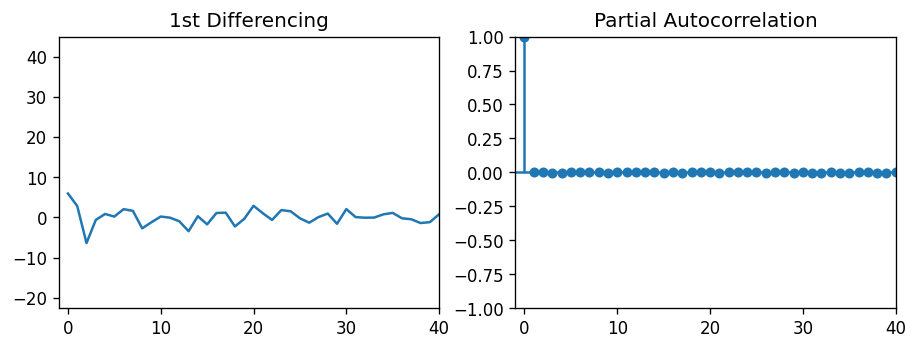

In [45]:
# PACF plot of 1st differenced series
import statsmodels.api as sm
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(new_df.values.flatten()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(-1.2,1.2),xlim=(-1,40))
sm.graphics.tsa.plot_pacf(new_df.values.flatten(), ax=axes[1])

plt.show()

<h3>Autocorrelation Plot</h3>

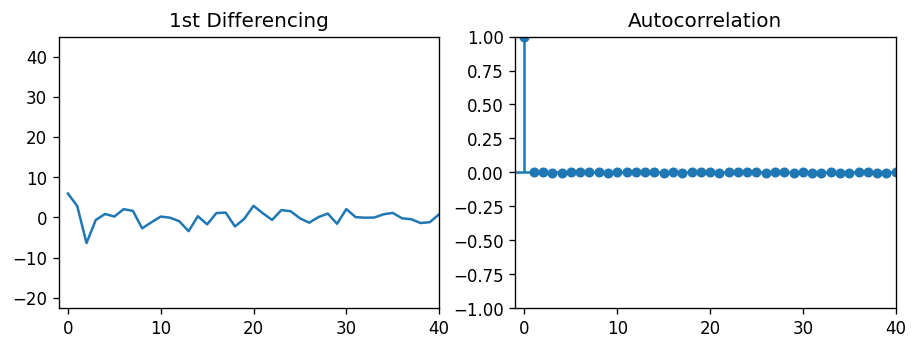

In [46]:
# ACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(new_df.values.flatten()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(-1.2,1.2),xlim=(-1,40))
sm.graphics.tsa.plot_acf(new_df.values.flatten(), ax=axes[1])

plt.show()

<h3>PACF and ACF Plots</h3>

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


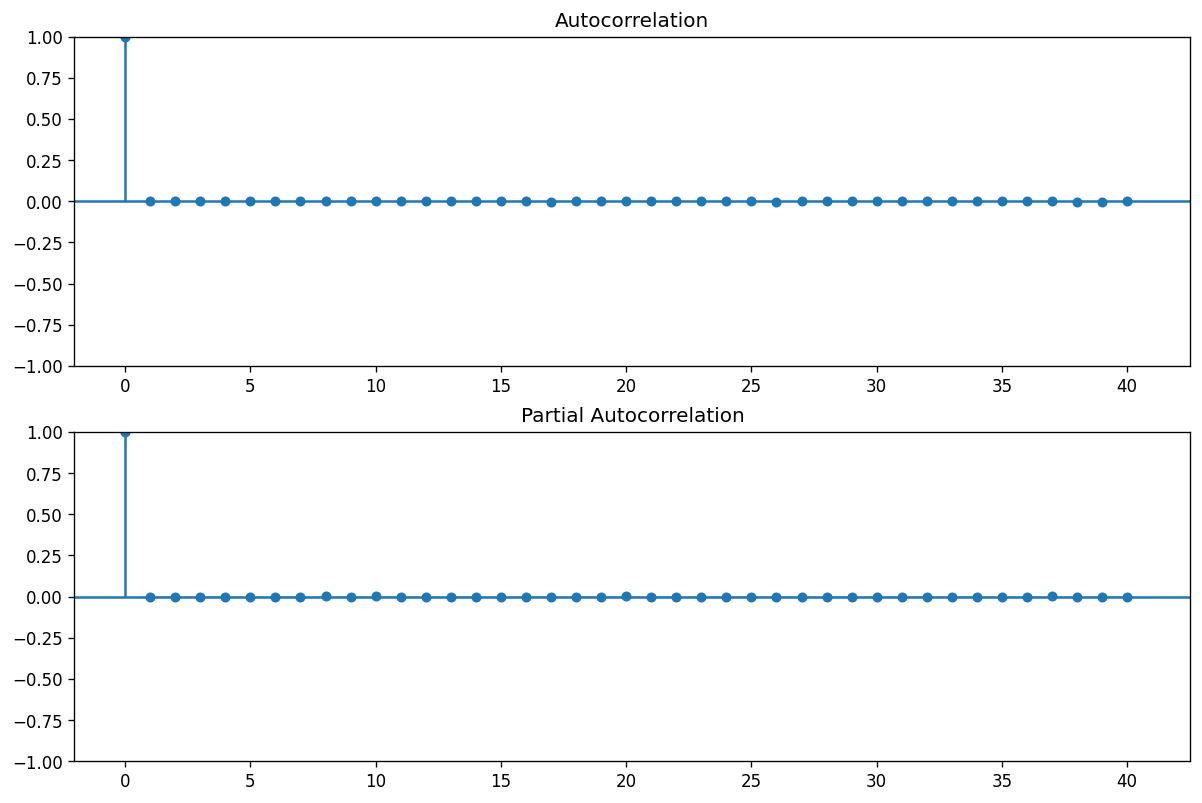

In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_df.values.flatten(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df.values.flatten(),lags=40,ax=ax2)

<b>As we can see, in both PACF and ACF plots, a lag of 1 is pretty significant. Therefore, we choose the ARIMA parameters 'p' and 'q' equal to 1. </b>

<h3>Building the ARIMA Model</h3>

In [48]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,0 ARIMA Model
model = ARIMA(new_df['target'].values.flatten(), order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4000
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6231.427
Date:                Mon, 25 Apr 2022   AIC                          12466.854
Time:                        23:52:02   BIC                          12479.441
Sample:                             0   HQIC                         12471.316
                               - 4000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4936      0.011    -45.824      0.000      -0.515      -0.472
sigma2         1.3212      0.021     62.437      0.000       1.280       1.363
Ljung-Box (L1) (Q):                 115.65   Jarque-

<h3>Residuals and Density Plot</h3>

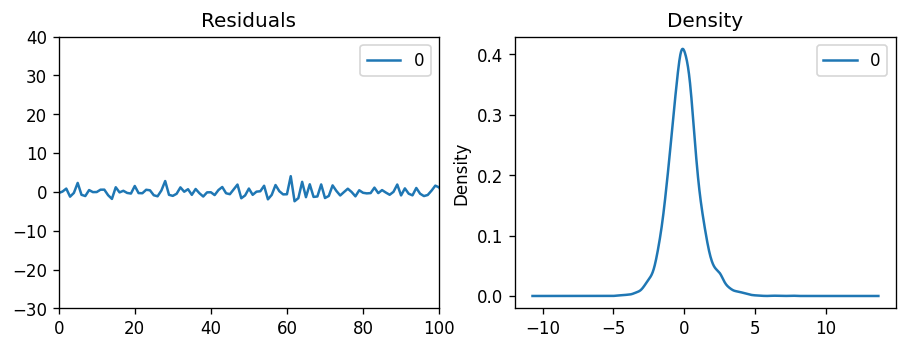

In [49]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
ax[0].set(ylim=(-30,40),xlim=(0,100))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<h3>Predictions from the model</h3>

In [50]:
predictions = model_fit.predict()
predictions

array([ 0.        , -0.30087466, -0.26550832, ...,  0.6290462 ,
       -0.36146563, -0.68774647])

In [51]:

pred1 = pd.DataFrame(predictions,columns = ['Target'])
pred1

,Target
0,0.000000
1,-0.300875
2,-0.265508
3,0.174028
4,-0.258494
...,...
3995,-0.257138
3996,0.432539
3997,0.629046
3998,-0.361466


<h3>Plot of the Actual vs Predicted Values</h3>

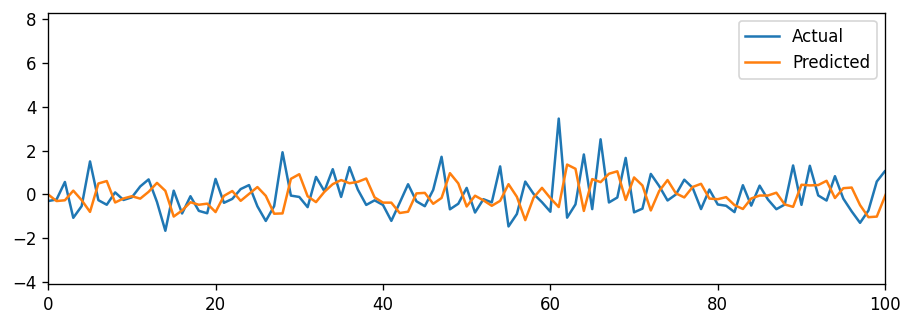

In [52]:
plt.plot(new_df['target'], label="Actual")
plt.plot(predictions, label = "Predicted")
plt.xlim(0,100)
plt.legend()

<h3>Evaluation Metrics</h3>

In [53]:
from sklearn import metrics
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(new_df['target'],predictions))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(new_df['target'],predictions))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(new_df['target'],predictions)))

Mean Absolute Error (MAE):  0.8593399464316451
Mean Squared Error (MSE):  1.3208995275858688
Root Mean Squared Error (RMSE):  1.1493039317716915
